# https://web.stanford.edu/class/cs20si/syllabus.html

In [1]:
import tensorflow as tf
import numpy as np

In [ ]:
a = tf.constant(2)
b = tf.constant(3)
x = tf.add(a, b)

writer = tf.summary.FileWriter('./graphs', tf.get_default_graph())  ## Create the summary writer after graph definition and before running your session
with tf.Session() as sess:
	# writer = tf.summary.FileWriter('./graphs', sess.graph) 
	print(sess.run(x))
writer.close() # close the writer when you’re done using it


## 'graphs’ or any location where you want to keep your event files


In [44]:
%tensorboard --logdir="./graphs" --port 6006

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 11756.

In [43]:
%load_ext tensorboard

In [ ]:
## Name to the variables

In [ ]:
a = tf.constant(2, name = 'a')
b = tf.constant(3, name = 'b')
x = tf.add(a, b, name = 'add')

writer = tf.summary.FileWriter('./graphs', tf.get_default_graph())  ## Create the summary writer after graph definition and before running your session
with tf.Session() as sess:
	# writer = tf.summary.FileWriter('./graphs', sess.graph) 
	print(sess.run(x))
writer.close() 

## tf.constant Syntax

tf.constant(
    value,
    dtype=None,
    shape=None,
    name='Const',
    verify_shape=False
)


In [ ]:
## Multiply


In [ ]:
a = tf.constant([2, 2], name='a')
b = tf.constant([[0, 1], [2, 3]], name='b')
x = tf.multiply(a, b, name='mul')
with tf.Session() as sess:
	print(sess.run(x))

# Tensors filled with a specific value

Create a tensor with zeros, tf.zeros, same as numpy.zeros

These are more compact than constants in the graph def, resulting in faster startup (especially in distributed where the graph must be send to all workers)

In [ ]:
sess = tf.Session()

In [ ]:
print(sess.run(tf.zeros([2, 3], tf.int32)))

### tf.zeros_like(input_tensor, dtype=None, name=None, optimize=True)

creates a tensor of shape and type (unless type is specified) as the input_tensor but all elements are zeros.

same as numpy.zeros_like

In [ ]:
input_tensor = [[0, 1], [2, 3], [4, 5]]
print(sess.run(tf.zeros_like(input_tensor)))

### tf.ones(shape, dtype=tf.float32, name=None)
### tf.ones_like(input_tensor, dtype=None, name=None, optimize=True)

Similar to numpy.ones, numpy.ones_like

### tf.fill(dims, value, name=None) 

### creates a tensor filled with a scalar value.

Similar to numpy.fill()



In [ ]:
print(sess.run(tf.fill([2, 3], 8)))

# Constants as sequences

NOT THE SAME AS NUMPY SEQUENCES

Tensor objects are not iterable

for _ in tf.range(4): # TypeError


In [ ]:
#tf.lin_space(start, stop, num, name=None) 
print(sess.run(tf.lin_space(10.0, 13.0, 4)))



In [ ]:
#tf.range(start, limit=None, delta=1, dtype=None, name='range')
print(sess.run(tf.range(3, 18, 3)))
print(sess.run(tf.range(5)))


## Randomly Generated Constants

tf.random_normal

tf.truncated_normal

tf.random_uniform

tf.random_shuffle

tf.random_crop

tf.multinomial

tf.random_gamma

You’ll often see use of tf.truncated_normal() instead of tf.random_normal(), as it doesn’t create any values more than two standard deviations away from its mean.

## Randomly Generated Constants

tf.set_random_seed(seed)

In [ ]:
tf.set_random_seed(2)

# Operations

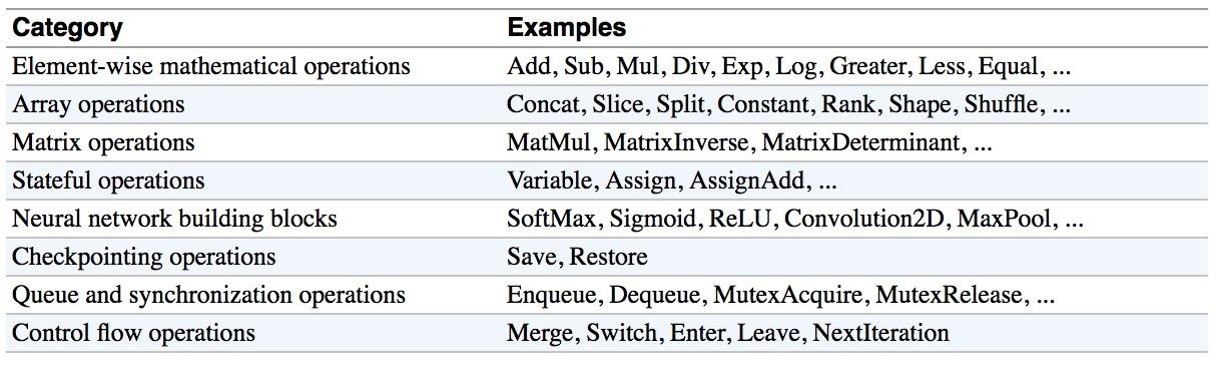

# Arithmetic Ops

Similar to numpy

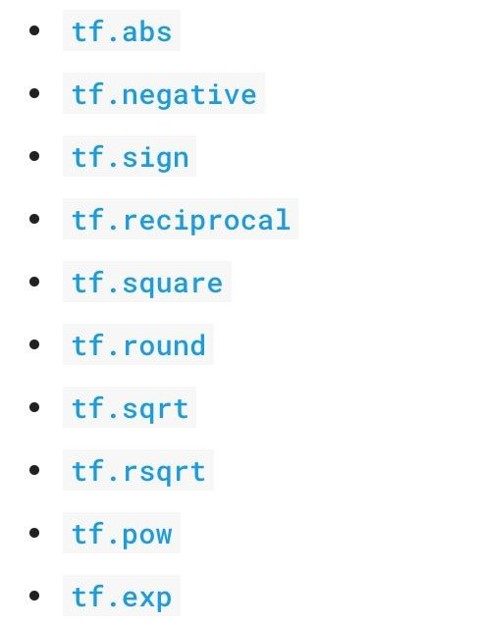

# Wizard of Div

### Make sure you read the documentation to understand which one to use. High level,, tf.div does TensorFlow’s style division, while tf.divide does exactly Python’s style division.


In [ ]:
a = tf.constant([2, 2], name='a')
b = tf.constant([[0, 1], [2, 3]], name='b')
with tf.Session() as sess:
	print(sess.run(tf.div(b, a)))             # [[0 0] [1 1]]
	print(sess.run(tf.divide(b, a)))          # [[0. 0.5] [1. 1.5]]
	print(sess.run(tf.truediv(b, a)))         # [[0. 0.5] [1. 1.5]]
	print(sess.run(tf.floordiv(b, a)))        # [[0 0] [1 1]]
	# print(sess.run(tf.realdiv(b, a)))         # # Error: only works for real values
	print(sess.run(tf.truncatediv(b, a)))     # [[0 0] [1 1]]
	print(sess.run(tf.floor_div(b, a)))       # [[0 0] [1 1]]


# TensorFlow Data Types

TensorFlow takes Python natives types: boolean, numeric (int, float), strings

In [ ]:
sess = tf.Session()

In [ ]:
t_0 = 19     # scalars are treated like 0-d tensors
sess.run(tf.zeros_like(t_0))                  # ==> 0



In [ ]:
sess.run(tf.ones_like(t_0))                  # ==> 1

In [ ]:
t_1 = [b"apple", b"peach", b"grape"] 	# 1-d arrays are treated like 1-d tensors
sess.run(tf.zeros_like(t_1))                 

In [ ]:
t_1 = [b"apple", b"peach", b"grape"] 	# 1-d arrays are treated like 1-d tensors
## sess.run(tf.ones_like(t_1))  ## Error, tf.ones is int and cant be placed in string type

#### Single values will be converted to 0-d tensors (or scalars), lists of values will be converted to 1-d tensors (vectors), lists of lists of values will be converted to 2-d tensors (matrices), and so on.


In [ ]:
t_2 = [[True, False, False],
  [False, False, True],
  [False, True, False]]


In [ ]:
sess.run(tf.zeros_like(t_2))                			# ==> ?????


In [ ]:
sess.run(tf.ones_like(t_2))

## Tensorflow Data Types

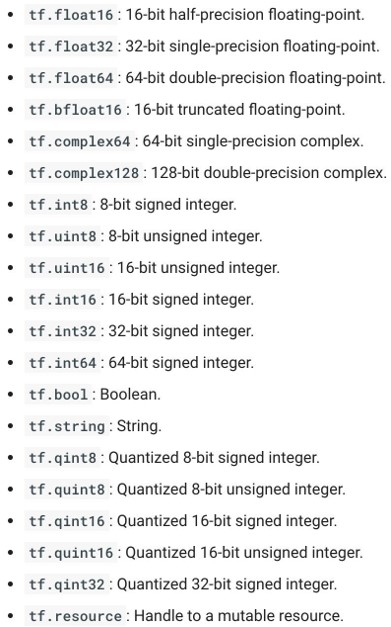

## TF vs NP Data Types

TensorFlow integrates seamlessly with NumPy

In [ ]:
import numpy as np

In [ ]:
tf.int32 == np.int32 			# ⇒ True

In [ ]:
# Can pass numpy types to TensorFlow ops
tf.ones([2, 2], np.float32) 	# ⇒ [[1.0 1.0], [1.0 1.0]]

In [ ]:
#For  tf.Session.run(fetches): if the requested fetch is a Tensor , output will be a NumPy ndarray.

sess = tf.Session()

a = tf.zeros([2, 3], np.int32)

print(type(a))  			# ⇒ <class 'tensorflow.python.framework.ops.Tensor'>

a_out = sess.run(a)                ## a = sess.run(a) <<<< Avoid doing this. Use a_out = sess.run(a)

print(type(a))  


## Use TF DType when possible

- <b>Python native types: TensorFlow has to infer Python type

Using Python types to specify TensorFlow objects is quick and easy, and it is useful for prototyping ideas. However, there is an important pitfall in doing it this way. Python types lack the ability to explicitly state the data type, but TensorFlow’s data types are more specific. For example, all integers are the same type, but TensorFlow has 8-bit, 16-bit, 32-bit, and 64-bit integers available. Therefore, if you use a Python type, TensorFlow has to infer which data type you mean. 

- <b>NumPy arrays: NumPy is not GPU compatible

It’s possible to convert the data into the appropriate type when you pass it into TensorFlow, but certain data types still may be difficult to declare correctly, such as complex numbers. Because of this, it is recommended to created hand-defined Tensor objects as NumPy arrays.


## What’s wrong with constants?

- <b>Constants are stored in the graph definition

In [5]:
sess = tf.Session()

In [ ]:
my_const = tf.constant([1.0, 2.0], name="my_const")
print(sess.graph.as_graph_def())


#### The graph definition is stored in a protobuf (protocol buffers, Google's language-neutral, platform-neutral, extensible mechanism for serializing structured data – think XML, but smaller, faster, and simpler.)

- 
This makes loading graphs expensive when constants are big


<b> Hence, Only use constants for primitive types.
Use variables or readers for more data that requires more memory


# Variables


In [3]:
# create variables with tf.Variable
s = tf.Variable(2, name="scalar") 
m = tf.Variable([[0, 1], [2, 3]], name="matrix") 
W = tf.Variable(tf.zeros([784,10]))

In [4]:
# create variables with tf.get_variable
s = tf.get_variable("scalar", initializer=tf.constant(2)) 
m = tf.get_variable("matrix", initializer=tf.constant([[0, 1], [2, 3]]))
W = tf.get_variable("big_matrix", shape=(784, 10), initializer=tf.zeros_initializer())

- tf.constant is an op
- tf.Variable is a class with many ops



#### tf.Variable holds several ops:

x = tf.Variable(...) 

x.initializer # init op

x.value() # read op

x.assign(...) # write op

x.assign_add(...) # and more


In [7]:
sess.run(W)

FailedPreconditionError: Attempting to use uninitialized value big_matrix
	 [[{{node _retval_big_matrix_0_0}}]]

## You have to initialize your variables


In [8]:
## The easiest way is initializing all variables at once:s
sess.run(tf.global_variables_initializer())


### Initializer is an op. You need to execute it within the context of a session

In [11]:
#Initialize only a subset of variables:
sess.run(tf.variables_initializer([s, W]))


In [12]:
#Initialize a single variable
W = tf.Variable(tf.zeros([784,10]))
sess.run(W.initializer)


In [13]:
W = tf.Variable(tf.truncated_normal([700, 10]))
sess.run(W.initializer)
print(W)


<tf.Variable 'Variable_2:0' shape=(700, 10) dtype=float32_ref>


In [15]:
W = tf.Variable(tf.truncated_normal([700, 10]))
with tf.Session() as sess:
    sess.run(W.initializer)
    print(W.eval())

[[-1.3966763  -0.69507164  0.41347665 ...  0.42587557  0.33898535
  -0.27123824]
 [-1.7458166  -0.0368231   1.3661604  ... -0.09910148 -0.6615795
  -0.53948414]
 [ 1.8153307  -0.7687611  -0.5413821  ... -0.32535806 -0.7059984
   0.26052976]
 ...
 [ 0.5864117   0.07781272  0.7867451  ...  0.90090066 -1.1366521
   0.03669626]
 [ 0.8948253  -0.501627    0.8219971  ...  0.58815444  0.80880547
   1.2722938 ]
 [ 1.1570226   1.3925239   0.4871293  ...  1.4812262   1.3006492
  -0.3032531 ]]


## tf.Variable.assign()

In [16]:
W = tf.Variable(10)
W.assign(100)
with tf.Session() as sess:
	sess.run(W.initializer)
	print(W.eval())


10


- <b>W.assign(100) creates an assign op. That op needs to be executed in a session to take effect.


In [17]:
W = tf.Variable(10)
assign_op = W.assign(100)
with tf.Session() as sess:
    sess.run(W.initializer)
    sess.run(assign_op)
    print(W.eval())

100


In [2]:
# create a variable whose original value is 2
my_var = tf.Variable(2, name="my_var") 

# assign a * 2 to a and call that op a_times_two
my_var_times_two = my_var.assign(2 * my_var)

with tf.Session() as sess:
    print(sess.run(my_var.initializer))
    print(sess.run(my_var_times_two))
    print(my_var.eval())
    print(sess.run(my_var_times_two))

None
4
4
8


In [10]:
my_var = tf.Variable(10)

with tf.Session() as sess:
    sess.run(my_var.initializer)
    # increment by 10 
    sess.run(my_var.assign_add(10)) # >> 20
    # decrement by 2 
    sess.run(my_var.assign_sub(2))

## Each session maintains its own copy of variables


In [12]:
W = tf.Variable(10)

sess1 = tf.Session()
sess2 = tf.Session()

sess1.run(W.initializer)
sess2.run(W.initializer)

print(sess1.run(W.assign_add(10))) 		# >> 20
print(sess2.run(W.assign_sub(2))) 


20
8


In [13]:
W = tf.Variable(10)

sess1 = tf.Session()
sess2 = tf.Session()

sess1.run(W.initializer)
sess2.run(W.initializer)

print(sess1.run(W.assign_add(10))) 		# >> 20
print(sess2.run(W.assign_sub(2))) 		# >> 8

print(sess1.run(W.assign_add(100))) 		# >> 120
print(sess2.run(W.assign_sub(50))) 		# >> -42

sess1.close()
sess2.close()


20
8
120
-42


## Control Dependencies

tf.Graph.control_dependencies(control_inputs)


In [22]:
sess = tf.Session()

In [26]:
## 
# defines which ops should be run first
# your graph g have 5 ops: a, b, c, d, e
my_var = tf.Variable(2, name="my_var") 

# assign a * 2 to a and call that op a_times_two
my_var_2 = my_var.assign(2 * my_var)
my_sub = my_var.assign_sub(1)

g = tf.get_default_graph()
with g.control_dependencies([my_sub]):
    # 'd' and 'e' will only run after 'a', 'b', and 'c' have executed.
    print(sess.run(my_var_2))

FailedPreconditionError: Attempting to use uninitialized value my_var_7
	 [[node my_var_7/read (defined at c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tensorflow_core\python\framework\ops.py:1748) ]]

Original stack trace for 'my_var_7/read':
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
    self.io_loop.start()
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\asyncio\base_events.py", line 541, in run_forever
    self._run_once()
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\asyncio\base_events.py", line 1786, in _run_once
    handle._run()
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\ipykernel\kernelbase.py", line 545, in execute_request
    user_expressions, allow_stdin,
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\IPython\core\interactiveshell.py", line 2877, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\IPython\core\interactiveshell.py", line 2922, in _run_cell
    return runner(coro)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\IPython\core\interactiveshell.py", line 3146, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\IPython\core\interactiveshell.py", line 3337, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\IPython\core\interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-26-e232059ad347>", line 4, in <module>
    my_var = tf.Variable(2, name="my_var")
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tensorflow_core\python\ops\variables.py", line 258, in __call__
    return cls._variable_v1_call(*args, **kwargs)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tensorflow_core\python\ops\variables.py", line 219, in _variable_v1_call
    shape=shape)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tensorflow_core\python\ops\variables.py", line 197, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tensorflow_core\python\ops\variable_scope.py", line 2519, in default_variable_creator
    shape=shape)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tensorflow_core\python\ops\variables.py", line 262, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tensorflow_core\python\ops\variables.py", line 1688, in __init__
    shape=shape)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tensorflow_core\python\ops\variables.py", line 1872, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tensorflow_core\python\util\dispatch.py", line 180, in wrapper
    return target(*args, **kwargs)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tensorflow_core\python\ops\array_ops.py", line 203, in identity
    ret = gen_array_ops.identity(input, name=name)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tensorflow_core\python\ops\gen_array_ops.py", line 4238, in identity
    "Identity", input=input, name=name)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tensorflow_core\python\framework\op_def_library.py", line 794, in _apply_op_helper
    op_def=op_def)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tensorflow_core\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3357, in create_op
    attrs, op_def, compute_device)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3426, in _create_op_internal
    op_def=op_def)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tensorflow_core\python\framework\ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()


# Placeholders

### TF program often has 2 phases: 
#### Assemble a graph 
#### Use a session to execute operations in the graph.

#### Assemble the graph first without knowing the values needed for computation


Analogy:
Define the function f(x, y) = 2 * x + y without knowing value of x or y. 
x, y are placeholders for the actual values.

- <b>We, or our clients, can later supply their own data when they need to execute the computation. 


#### tf.placeholder(dtype, shape=None, name=None)

In [28]:
# create a placeholder for a vector of 3 elements, type tf.float32
a = tf.placeholder(tf.float32, shape=[3])

b = tf.constant([5, 5, 5], tf.float32)

# use the placeholder as you would a constant or a variable
c = a + b  # short for tf.add(a, b)

with tf.Session() as sess:
	print(sess.run(c)) 				# >> ???


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [3]
	 [[node Placeholder (defined at c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tensorflow_core\python\framework\ops.py:1748) ]]

Original stack trace for 'Placeholder':
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
    self.io_loop.start()
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\asyncio\base_events.py", line 541, in run_forever
    self._run_once()
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\asyncio\base_events.py", line 1786, in _run_once
    handle._run()
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\ipykernel\kernelbase.py", line 545, in execute_request
    user_expressions, allow_stdin,
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\IPython\core\interactiveshell.py", line 2877, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\IPython\core\interactiveshell.py", line 2922, in _run_cell
    return runner(coro)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\IPython\core\interactiveshell.py", line 3146, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\IPython\core\interactiveshell.py", line 3337, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\IPython\core\interactiveshell.py", line 3417, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-a31b44f54648>", line 2, in <module>
    a = tf.placeholder(tf.float32, shape=[3])
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tensorflow_core\python\ops\array_ops.py", line 2619, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tensorflow_core\python\ops\gen_array_ops.py", line 6668, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tensorflow_core\python\framework\op_def_library.py", line 794, in _apply_op_helper
    op_def=op_def)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tensorflow_core\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3357, in create_op
    attrs, op_def, compute_device)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3426, in _create_op_internal
    op_def=op_def)
  File "c:\users\admin\anaconda3\envs\test_novelis\lib\site-packages\tensorflow_core\python\framework\ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()


#### Supplement the values to placeholders using a dictionary


In [29]:
with tf.Session() as sess:
	print(sess.run(c, feed_dict={a: [1, 2, 3]})) 

[6. 7. 8.]


#### Quirk:
#### shape=None means that tensor of any shape will be accepted as value for placeholder.

#### shape=None is easy to construct graphs, but nightmarish for debugging
 

### The session will look at the graph, trying to think: hmm, how can I get the value of a, then it computes all the nodes that leads to a.

### Placeholders are valid ops

- we can feed_dict any tensors. placeholders are just a way to indicate that sth must be fed


# What if want to feed multiple data points in?


In [ ]:
## You have to do it one at a time
with tf.Session() as sess:
	for a_value in list_of_values_for_a:
	print(sess.run(c, {a: a_value}))


In [ ]:
#tf.Graph.is_feedable(tensor) 
# True if and only if tensor is feedable.


In [37]:
# create operations, tensors, etc (using the default graph)
a = tf.add(2, 5)
b = tf.multiply(a, 3)

with tf.Session() as sess:
    # compute the value of b given a is 15
    print(sess.run(b, feed_dict={a: 15})) 	
    print(sess.run(a))

45
7


## Defer creating/initializing an object until it is needed(Lazy Loading)


In [39]:
#Normal loading
x = tf.Variable(10, name='x')
y = tf.Variable(20, name='y')
z = tf.add(x, y) 		# create the node before executing the graph

writer = tf.summary.FileWriter('./graphs/normal_loading', tf.get_default_graph())
with tf.Session() as sess:
	sess.run(tf.global_variables_initializer())
	for _ in range(10):
		print(sess.run(z))
writer.close()


30
30
30
30
30
30
30
30
30
30


In [41]:
#Lazy loading
x = tf.Variable(10, name='x')
y = tf.Variable(20, name='y')

writer = tf.summary.FileWriter('./graphs/normal_loading', tf.get_default_graph())
with tf.Session() as sess:
	sess.run(tf.global_variables_initializer())
	for _ in range(10):
		print(sess.run(tf.add(x, y))) # someone decides to be clever to save one line of code
writer.close()


30
30
30
30
30
30
30
30
30
30


#### Both give the same value of z, What’s the problem?


In [42]:
tf.get_default_graph().as_graph_def()

node {
  name: "my_var/initial_value"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 2
      }
    }
  }
}
node {
  name: "my_var"
  op: "VariableV2"
  attr {
    key: "container"
    value {
      s: ""
    }
  }
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "shape"
    value {
      shape {
      }
    }
  }
  attr {
    key: "shared_name"
    value {
      s: ""
    }
  }
}
node {
  name: "my_var/Assign"
  op: "Assign"
  input: "my_var"
  input: "my_var/initial_value"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "_class"
    value {
      list {
        s: "loc:@my_var"
      }
    }
  }
  attr {
    key: "use_locking"
    value {
      b: true
    }
  }
  attr {
    key: "validate_shape"
    value {
      b: true
    }
  }
}
node {
  name: "my_

#### With Lazy Loading Node “Add” added 10 times to the graph definition Or as many times as you want to compute z


In [45]:
# Imagine you want to compute an op thousands, or millions of times!
